# Standard atmosphere code (`atmos`)
This example shows how to use the the module `atmos` in order to compute the properties of the atmosphere with height.  The calculations take pressure or height and return the other, along with density, temperature, and a variety of other useful quantities. 

For SHDOM these codes are needed to compute `Z` and `T` values that are used in generating `.prop` files.

In [39]:
%pylab inline

# Third Party
import numpy as np
import scipy as sp
from pandas import DataFrame

# My standard atmosphere wrapper
from propgen import atmos

Populating the interactive namespace from numpy and matplotlib


In [40]:
# Define an atmosphere
height = np.linspace(0,sp.sqrt(80),100)**2
standard_atmosphere = atmos.get_atm(height, lat='standard', vcoord='height')

# Convert to a data Frame
sa_frame = DataFrame(standard_atmosphere)



## Using the atmosphere data
This last step made a data frame with the atmosphere calculations output to columns.  The name of each column is derived from the dtype of the array output by `get_atm`.
```
standard_atmosphere.dtype
```

Using a dtype to define the meaning of the output is helpful.  Not that these name appear automatically as the column headings.  Also, they can be used to label plots automatically.

In [47]:
# Printing some data from the data frame

print("\nThe columns of the data frame:")
print("--")
msg = "standard_atmosphere.dtype -> \n\n{}"
print(msg.format(repr(standard_atmosphere.dtype)))
print("\n\nThe columns of the data frame:")
print("--")
for col in sa_frame.columns:
        print(col)

print("\n\nThe first four columns:")
print("--")
print(sa_frame.ix[::5,:4])


The columns of the data frame:
--
standard_atmosphere.dtype -> 

dtype([('pressure', '<f8'), ('height', '<f8'), ('density', '<f8'), ('temperature', '<f8'), ('ozone_mixing_ratio', '<f8'), ('specific_humidity', '<f8'), ('saturation_ratio', '<f8'), ('ozone_above', '<f8'), ('water_vapor_above', '<f8')])


The columns of the data frame:
--
pressure
height
density
temperature
ozone_mixing_ratio
specific_humidity
saturation_ratio
ozone_above
water_vapor_above


The first four columns:
--
       pressure     height      density  temperature
0   1013.250000   0.000000  1225.000000   288.149994
5    989.874817   0.204061  1201.941162   286.823608
10   919.749329   0.816243  1132.764526   282.844421
15   811.950073   1.836547  1023.325989   276.212433
20   678.656799   3.264973   885.252441   266.927673
25   533.256042   5.101520   728.343872   254.990112
30   391.698090   7.346189   567.240051   240.399765
35   264.443878   9.998980   412.754700   223.156631
40   163.656616  13.059892   263.182

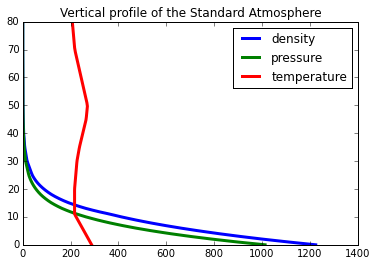

In [18]:
plot(sa_frame['density'], sa_frame['height'], linewidth=3,
    label='density')
plot(sa_frame['pressure'],sa_frame['height'], linewidth=3, 
    label='pressure')
plot(sa_frame['temperature'], sa_frame['height'], linewidth=3, 
    label='temperature')
title("Vertical profile of the Standard Atmosphere")
legend(loc='best')